In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLP_util import *

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataset = pd.read_csv('housepricedata.csv')
dataset = dataset.dropna()

X = dataset.values[:, 0:10]
Y = dataset.values[:, 10]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)
train_set_x = X_train.T
train_set_y = Y_train.T
test_set_x = X_test.T
test_set_y = Y_test.T
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

print("Size of train set input : " + str(train_set_x.shape))
print("Size of train set output : " + str(train_set_y.shape))
print("Size of test set input : " + str(test_set_x.shape))
print("Size of test set output : " + str(test_set_y.shape))

Size of train set input : (10, 1022)
Size of train set output : (1, 1022)
Size of test set input : (10, 438)
Size of test set output : (1, 438)


In [39]:
dataset

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
layers_dims = [10, 20, 35, 20, 1]

def L_layer_NN(X, Y, layers_dims, learningRate = 0.0075, num_itr = 2500, printCost = False):
    np.random.seed(1)
    grads = {}
    costs = []
    Afn = {}
    dfn = {}
    parameters = initialize_parameters_layers(layers_dims)
    Afn["A1"] = X
    m = X.shape[1]
    for i in range(0, num_itr):
        # A1 is input layer
        L = len(layers_dims)
        for l in range(1, L-1):
            Afn["A"+str(l+1)] = linear_activation_fwd(Afn["A"+str(l)], parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        Afn["A"+str(L)] = linear_activation_fwd(Afn["A"+str(L-1)], parameters["W"+str(L-1)], parameters["b"+str(L-1)], "sigmoid")
        #print(str(Afn["A2"]))
        cost = compute_cost(Afn["A"+str(L)], Y)
        dfn["d"+str(L)] = Afn["A"+str(L)] - Y
        for l in reversed(range(2, L)):
            C = np.zeros(Afn["A"+str(l)].shape)
            Z = linear_fwd(Afn["A"+str(l-1)], parameters["W"+str(l-1)],  parameters["b"+str(l-1)])
            C = (Z>0) * 1.0
            dfn["d"+str(l)] = np.dot((parameters["W"+str(l)]).T, dfn["d"+str(l+1)]) * C
        grads["db"+str(L-1)] = (1./m) * (np.sum(dfn["d"+str(L)]))
        grads["dW"+str(L-1)] = (1./m) * (np.dot(dfn["d"+str(L)], Afn["A"+str(L-1)].T))
        for l in range(1, L-1):
            grads["dW"+str(l)] = (1./m) * (np.dot(dfn["d"+str(l+1)], Afn["A"+str(l)].T))
            grads["db"+str(l)] = (1./m) * (np.sum(dfn["d"+str(l+1)], axis = 1, keepdims = True))
        parameters = update_parameters(parameters, grads, learningRate)
        #print(str(b1))
        if printCost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if printCost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learningRate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6946226663274654
Cost after iteration 100: 0.6459214331107732
Cost after iteration 200: 0.41619349910258724
Cost after iteration 300: 0.2987734383131467
Cost after iteration 400: 0.2623780523086991
Cost after iteration 500: 0.24498715223926903
Cost after iteration 600: 0.24659105036913712
Cost after iteration 700: 0.2406159616607134
Cost after iteration 800: 0.23707352738020893
Cost after iteration 900: 0.23602672017042867
Cost after iteration 1000: 0.23041044856835727
Cost after iteration 1100: 0.2362786644374903
Cost after iteration 1200: 0.24069856713277712
Cost after iteration 1300: 0.24134992565300398
Cost after iteration 1400: 0.2406119553018114


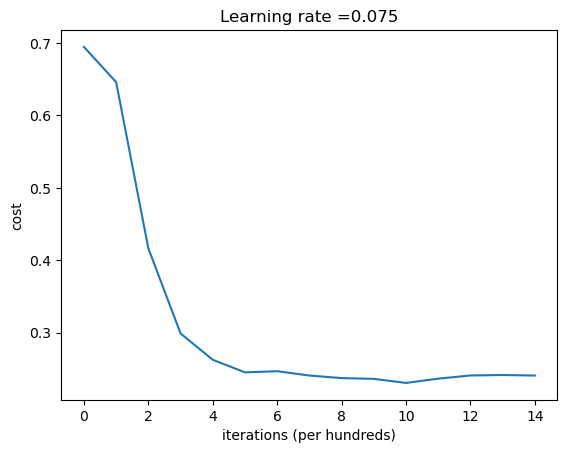

In [7]:
parameters = L_layer_NN(train_set_x, train_set_y, layers_dims, learningRate = 0.075, num_itr = 1500, printCost = True)

In [8]:
print("***Training Set***")
pred = predict(train_set_x, train_set_y, parameters, layers_dims)
print("***Test Set***")
pred = predict(test_set_x, test_set_y, parameters, layers_dims)

***Training Set***
Accuracy : 0.9021526418786693
***Test Set***
Accuracy : 0.8789954337899544


In [43]:
pred = pred.astype(int)
print("\n\n Input: ", test_set_x[:, 0])
print("\n\n Target: ", test_set_y[0][0])
print("\n\n Prediction: ", pred[0][0])



 Input:  [0.04181449 0.33333333 1.         0.10605565 0.         0.
 0.         0.08333333 0.         0.25669958]


 Target:  0


 Prediction:  0


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 

In [44]:
y_actu = pd.Series(test_set_y[0], name='Actual')
y_pred = pd.Series(pred[0], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1
Actual,,
0,208,14
1,39,177
